# Implementation of overfitting, underfitting and regularization

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


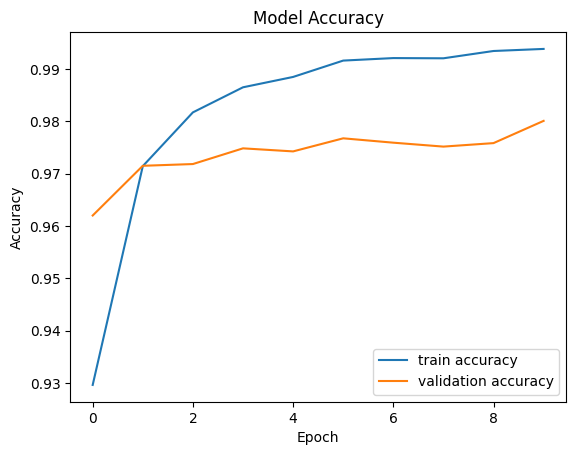

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28) / 255.0  # Flatten and normalize
X_test = X_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)

# Function to plot the training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Overfitting Example: Large Model with No Regularization
model_overfit = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_overfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_overfit = model_overfit.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

# Plot Overfitting History
plot_history(history_overfit)



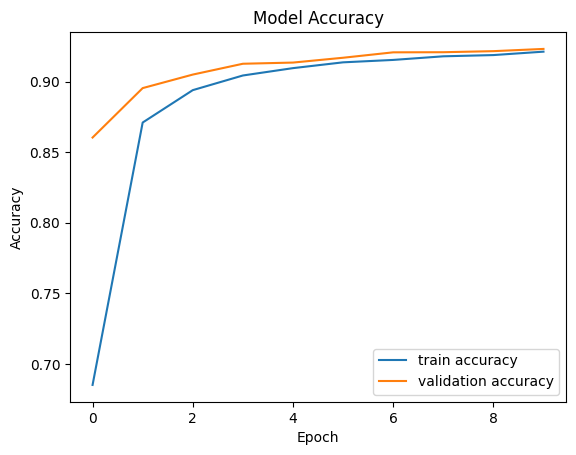

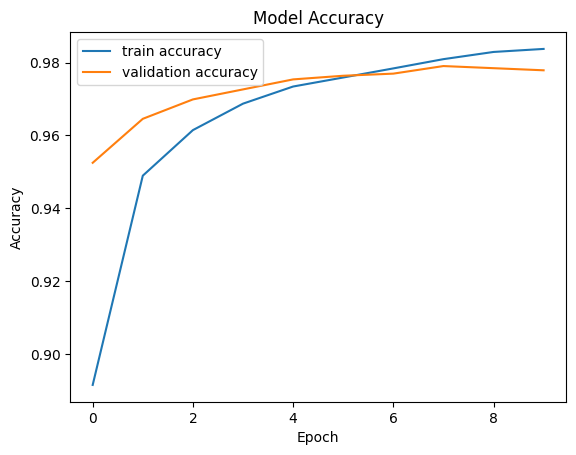

Test accuracy (Overfitting Model): 0.9786
Test accuracy (Underfitting Model): 0.9218
Test accuracy (Regularized Model): 0.9791


In [3]:
# Underfitting Example: Small Model
model_underfit = Sequential([
    Dense(8, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

model_underfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_underfit = model_underfit.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

# Plot Underfitting History
plot_history(history_underfit)

# Regularization Example: Model with Dropout
model_regularized = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dropout(0.5),  # Regularization: Dropout layer
    Dense(10, activation='softmax')
])

model_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_regularized = model_regularized.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

# Plot Regularization History
plot_history(history_regularized)

# Evaluate the models
test_loss, test_accuracy_overfit = model_overfit.evaluate(X_test, y_test, verbose=0)
test_loss, test_accuracy_underfit = model_underfit.evaluate(X_test, y_test, verbose=0)
test_loss, test_accuracy_regularized = model_regularized.evaluate(X_test, y_test, verbose=0)

print(f'Test accuracy (Overfitting Model): {test_accuracy_overfit:.4f}')
print(f'Test accuracy (Underfitting Model): {test_accuracy_underfit:.4f}')
print(f'Test accuracy (Regularized Model): {test_accuracy_regularized:.4f}')
